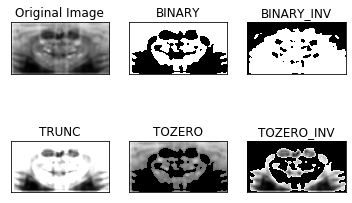

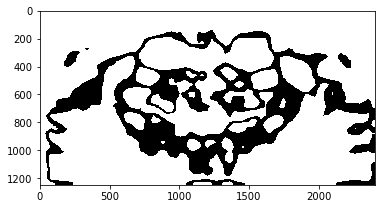

In [24]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('g4.jpg',0)
ret,thresh1 = cv.threshold(img,100,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,130,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,100,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,100,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,100,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

a=cv2.bitwise_xor(thresh1,thresh2)
plt.imshow(a,cmap='gray')

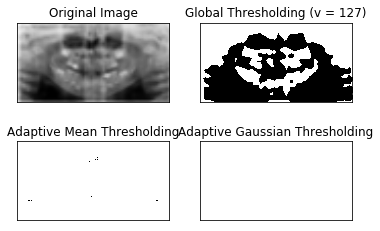

14


True

In [13]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('g4.jpg',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,110,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#ret, thresh = cv2.threshold(img, 127, 255, 0)
contours, hierarchy = cv.findContours(th1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
i=cv.drawContours(th1, contours, -1, (100,100,100), 10)
print(len(contours))
cv.imwrite('contor.jpg',i)
f=cv.imread('g4.jpg')
hull_list = []
for i in range(len(contours)):
    hull = cv.convexHull(contours[i])
    hull_list.append(hull)
    # Draw contours + hull results
drawing = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):
    color = (100,100,100)
    cv.drawContours(f, contours, i, (255,255,255))
    cv.drawContours(f, hull_list, i, color)
# Show in a windo
cv.imwrite('hull.jpg', drawing)



In [27]:
import numpy as np
import cv2 as cv
Z = th1
#Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = ( cv.TERM_CRITERIA_MAX_ITER, 4,1.0)
K = 2
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_PP_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv.imwrite('res2.jpg',res2)


True

In [14]:

import cv2
import numpy as np


kernel = np.ones((3,3), dtype=np.uint8)
closing = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel)
contours, hierarchy = cv2.findContours(th1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = max(contours, key=cv2.contourArea)
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(th1, (x,y), (x+w, y+h), (255,255,0), 1)
cv2.imwrite('img.jpg', img)




True

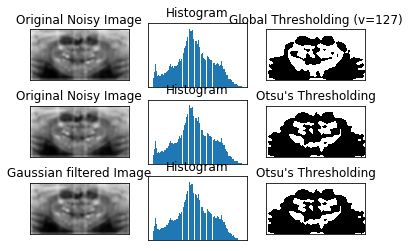

In [15]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('h3.jpg',0)
# global thresholding
ret1,th1 = cv.threshold(img,100,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [16]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
import random as rng
rng.seed(12345)
def thresh_callback(val):
    threshold = val
    # Detect edges using Canny
    canny_output = cv.Canny(src_gray, threshold, threshold * 2)
    # Find contours
    _, contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    # Find the convex hull object for each contour
    hull_list = []
    for i in range(len(contours)):
        hull = cv.convexHull(contours[i])
        hull_list.append(hull)
    # Draw contours + hull results
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    for i in range(len(contours)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv.drawContours(drawing, contours, i, color)
        cv.drawContours(drawing, hull_list, i, color)
    # Show in a window
    cv.imshow('Contours', drawing)
# Load source image
parser = argparse.ArgumentParser(description='Code for Convex Hull tutorial.')
parser.add_argument('--input', help='Path to input image.', default='stuff.jpg')
args = parser.parse_args()
src = cv.imread(cv.samples.findFile(args.input))
if src is None:
    print('Could not open or find the image:', args.input)
    exit(0)
# Convert image to gray and blur it
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
src_gray = cv.blur(src_gray, (3,3))
# Create Window
source_window = 'Source'
cv.namedWindow(source_window)
cv.imshow(source_window, src)
max_thresh = 255
thresh = 100 # initial threshold
cv.createTrackbar('Canny thresh:', source_window, thresh, max_thresh, thresh_callback)
thresh_callback(thresh)
cv.waitKey()

usage: ipykernel_launcher.py [-h] [--input INPUT]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\Nirzari\AppData\Roaming\jupyter\runtime\kernel-44623455-467f-406a-8fdc-2c8b383e8d4a.json


SystemExit: 2

c:\python\lib\site-packages\IPython\core\interactiveshell.py:3327: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
